In [ ]:
#Neste relatório estaremos analisando o os dados referentes aos passageiros do titanic. Baseados nestes dados vamos tentar descobrir 
#algumas informação sobre os sobreviventes e os que faleceram.

#Segue a relação das perguntas:

#Quantos passageiros morreram?
#Quantos passageiros sobreviveram?
#Qual a classe dos que sobreviveram?
#Qual a classe dos que morreram?
#Qual a média de idade e o desvio padrão dos que sobreviveram?
#Qual a média de idade e o desvio padrão dos que morreram?
#Dos sobreviventes mulheres e homens qual a classe pertenciam?
#Qual a correlaçao entre as variáveis?



In [2]:
#importando as bibliotecas pandas , matplotlib e seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Lendo o csv e importando como dataframe.
t = pd.read_csv('https://storage.googleapis.com/supplemental_media/udacityu/5420148578/titanic_data.csv')
t.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#Limpeza dos dados para retirada dos campos 'NaN' de idade, sexo, classe
#Foi decidido pela limpeza desses campos uma vez que a quantidade retirada não afetaria a análise dos dados.


#Segue a quantidade de dados nulos de cada variável utilizada no projeto:

p=t.isnull().sum()


titanic= t.dropna(subset = ['Age', 'Sex', 'Pclass'])

#Após a limpeza ainda temos a quantidade de 714 de um total de 891 registros, ou seja, 80% dos registros válidos para nossa 
# análise.

#Não foi utilizada a variável 'Cabin', por este motivo decidimos não limpá-la, além do agravante que esta variável continha mais 
#metade dos dados nulos(687 registros), ou seja, se fosse retirados os campos 'NaN' da variável 'Cabin' ficaríamos apenas com
# 204 registros válidos, que representa 23% do total, um valor muito reduzido para uma análise.
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [16]:
#Quantos passageiros morreram?

die=titanic[titanic['Survived'] ==0]
total_die = die['PassengerId'].count()

print total_die

#Total de passageiros que faleceram foi de 424.


424


In [6]:
#Quantos passageiros sobreviveram?
live=titanic[titanic['Survived'] ==1] 
total_live = live['PassengerId'].count()

print total_live

#Total de passageiros que sobreviveram foi de 290.


290


In [7]:
#Qual a classe dos que sobreviveram?
pclass_live=live.groupby('Pclass').count()['PassengerId']
pclass_live_pcts=live.groupby('Pclass').size().divide(sum(live['Pclass'].notnull()))*100

print pclass_live
print pclass_live_pcts

#Dentre os passageiros sobreviventes a grande maioria (42%) estavam na classe 1.


Pclass
1    122
2     83
3     85
Name: PassengerId, dtype: int64
Pclass
1    42.068966
2    28.620690
3    29.310345
dtype: float64


In [8]:

#Qual a classe dos que morreram?

pclass_die=die.groupby('Pclass').agg({'PassengerId': 'count'})

pclass_die_pcts=die.groupby('Pclass').size().divide(sum(die['Pclass'].notnull()))*100

print pclass_die
print pclass_die_pcts

#Dentre os passageiros que morreram 64.00% foram da classe 3



        PassengerId
Pclass             
1                64
2                90
3               270
Pclass
1    15.094340
2    21.226415
3    63.679245
dtype: float64


In [9]:
#Qual a média de idade e o desvio padrão dos que sobreviveram?

age_live= live['Age'].describe()

             
print age_live

sns.distplot(live['Age'])

#Dentre os passageiros que sobreviveram a média de idade era de 28 anos 

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


In [10]:


#Qual a média de idade e o desvio padrão dos que morreram?

age_die= die['Age'].describe()
             
print age_die


sns.distplot(die['Age'])

#Dentre os passageiros que morreram a média de idade era de 30 anos como podemos ver no tabela e no histograma.


count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


In [11]:
%pylab inline
import seaborn as sns
#Sobreviventes mulheres e homens por classe
women_man=live.groupby(['Sex','Pclass']).count()['PassengerId']
print women_man

#O que vemos aqui é a quantidade de sobreviventes por classe econômica e por sexo.
#Podemos observar que sobreviveram um número maior de mulheres independente da classe a que estavam , com relação ao homens.


Populating the interactive namespace from numpy and matplotlib
Sex     Pclass
female  1         82
        2         68
        3         47
male    1         40
        2         15
        3         38
Name: PassengerId, dtype: int64


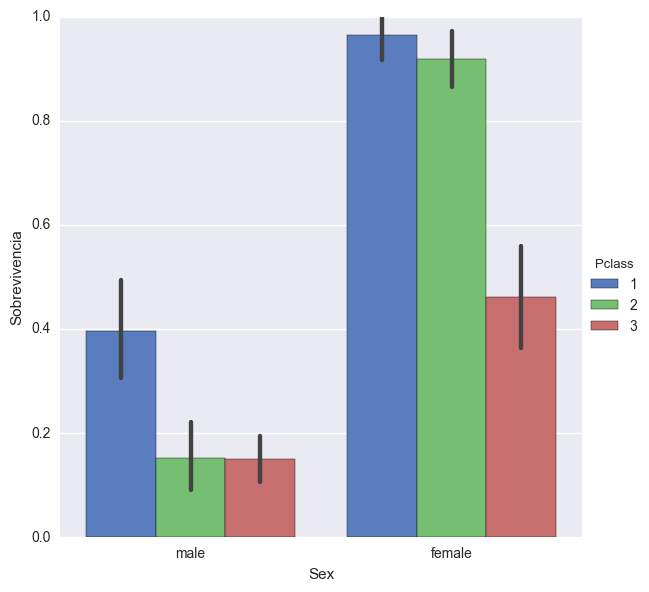

In [12]:
#Gráfico mostrando a sobreviventes por sexo e classe
g = sns.factorplot(x="Sex", y="Survived", hue="Pclass", data=titanic,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Sobrevivencia")



Pclass
1    35.368197
2    25.901566
3    20.646118
Name: Age, dtype: float64


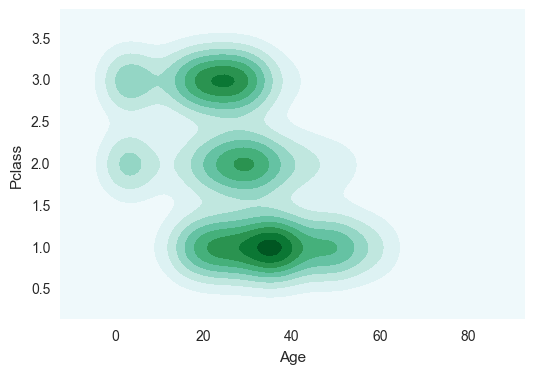

In [21]:
#Media de idade dos sobreviventes por classe
age_live=live.groupby(['Pclass']).mean()['Age']
print age_live

#Gráfico mostrando a distribuição por idade e classe dos sobreviventes
la=live['Age']
lc=live['Pclass']
sns.kdeplot(la, lc, shade=True)


#No gráfico podemos ver uma grande maioria dos sobreviventes estavam na 1 classe com média de idade de 35 anos


Pclass
1    43.695312
2    33.544444
3    26.555556
Name: Age, dtype: float64


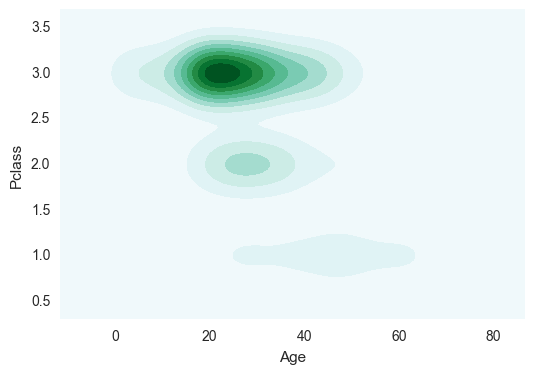

In [22]:
#Media de idade dos sobreviventes por classe
age_die=die.groupby(['Pclass']).mean()['Age']
print age_die

#Gráfico mostrando a distribuição por idade e classe dos mortos
la=die['Age']
lc=die['Pclass']
sns.kdeplot(la, lc, shade=True)



#No gráfico podemos ver uma grande maioria dos mortos estavam na 3 classe com média de idade de 26 anos

In [59]:
#Correlaçao entre variáveis
# Calculo da correlação entre todas as variáveis númericas analisadas.

tt=live[['Pclass','Age','SibSp','Parch','Fare']]

corr_tt = tt.corr(method='pearson')

corr_tt


,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.418073,-0.021243,0.064158,-0.527951
Age,-0.418073,1.000000,-0.143309,-0.315599,0.162648
SibSp,-0.021243,-0.143309,1.000000,0.290565,0.107484
Parch,0.064158,-0.315599,0.290565,1.000000,0.100532
Fare,-0.527951,0.162648,0.107484,0.100532,1.000000


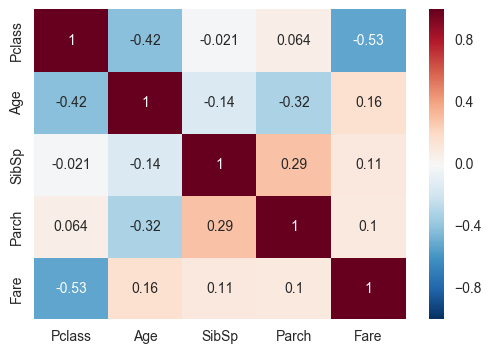

In [60]:
#Importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt


# Visualizando mapa de calor com as correlações entre os campos númericos analisados.
sns.heatmap(corr_tt, vmax=1, vmin=-1,annot=True)



In [ ]:
#Conclusão

#Segue a relação das perguntas:

#Quantos passageiros morreram?
#Quantos passageiros sobreviveram?
#Qual a classe dos que sobreviveram?
#Qual a classe dos que morreram?
#Qual a média de idade e o desvio padrão dos que sobreviveram?
#Qual a média de idade e o desvio padrão dos que morreram?
#Dos sobreviventes mulheres e homens qual a classe pertenciam?
#Qual a correlaçao entre as variáveis?

# O trabalho apresentado mostra alguns dados coletados e informações que obetivemos a partir da amostra. Devemos considerar
# que devido a quantidade reduzida de dados, além da falta de alguns deles não é possível retirar um conclusão com valores
# estatísticos e sim baseado nas observações.
# Não foi possível fazer uma correlação acurada entre os sobrevintes, apenas demonstrando que a maioria era da primeira classe 
# eram mulheres.
# Várias possibilidades podem ter acontecido para esse acontecimento, tais como proximidade com os botes salva vidas.
# Outras variáveis deveriam ser levadas em consideração, tais como quantidade de botes salva vidas para estimar a quantidade
# de pessoas que poderiam ser salvas.
